In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)


data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 understand the shape and structure

In [11]:
# How many rows and columns?
print("Shape of dataset:", data.shape)

# General info (types, non-null counts)
data.info()

# Basic statistics
data.describe()


Shape of dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Check for zeros in places that shouldn't be zero
print((data == 0).sum())


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [13]:
# List of columns to clean
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with the mean of each column
for column in columns_to_fix:
    mean_value = data[column][data[column] != 0].mean()
    data[column] = data[column].replace(0, mean_value)


In [14]:
# Check for zeros in places that shouldn't be zero
print((data == 0).sum())


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


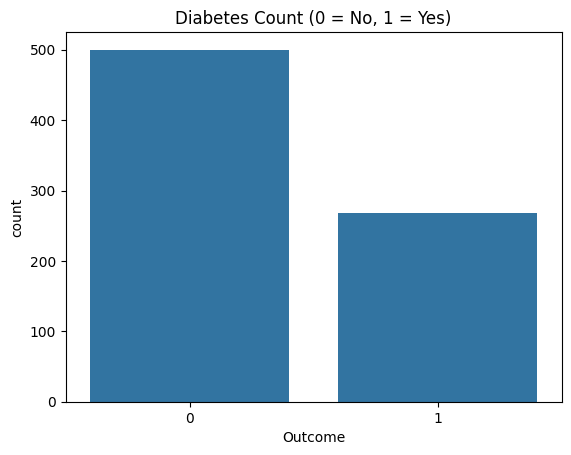

In [15]:
# Python visualization library based on Matplotlib, designed for statistical data visualization
import seaborn as sns


# Count how many have diabetes vs not
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Count (0 = No, 1 = Yes)")
plt.show()


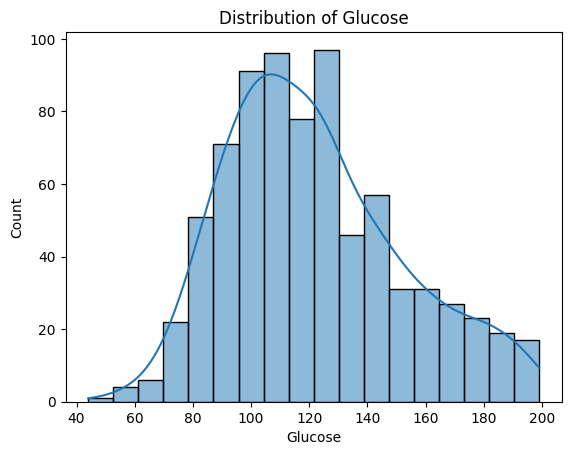

In [16]:
# Distribution of glucose levels
sns.histplot(data['Glucose'], kde=True)
plt.title("Distribution of Glucose")
plt.show()


 Splitting the Data & Training the Model




X = df.drop("Outcome", axis=1)
On enlève la colonne Outcome (qui indique si la personne est diabétique ou non), pour garder uniquement les caractéristiques (features) :

Glucose, Age, BMI, etc.

✅ X contient donc les entrées (input) du modèle.

3. y = df["Outcome"]
On garde la colonne Outcome dans y : c’est la valeur cible (output) à prédire (0 = non diabétique, 1 = diabétique).



In [17]:
# Split the dataset into inputs (X) and output label (y)
X = data.drop('Outcome', axis=1)  # All features except the target
y = data['Outcome']               # Target variable: 0 or 1 (diabetes or not)

# Split into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model

            #Logistic regression is a classification algorithm. It predicts a binary outcome: 0 or 1 — in this case: diabetes or not.
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)   #max_iter=1000 means we allow the model to try 1000 times to find the best solution (to make sure it converges).


model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]


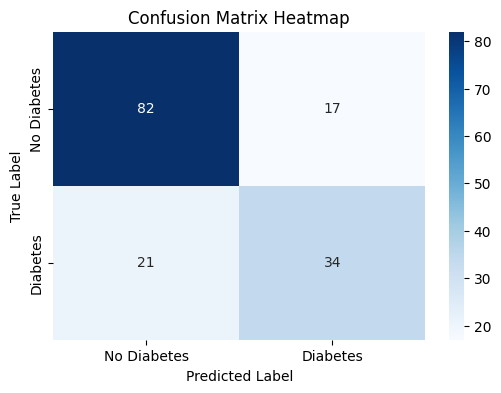

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Essayer d’autres modèles pour comparer (RandomForest, KNN...),

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


Random Forest Accuracy

In [20]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Confusion Matrix
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Accuracy: 0.7532467532467533
Confusion Matrix (Random Forest):
[[80 19]
 [19 36]]


K-Nearest Neighbors (KNN)

In [21]:
# Create and train a KNN model (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
knn_predictions = knn_model.predict(X_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

# Confusion Matrix
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, knn_predictions))


KNN Accuracy: 0.6493506493506493
Confusion Matrix (KNN):
[[66 33]
 [21 34]]


In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# K-Nearest Neighbors (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

# Print accuracies
print(f"Logistic Regression Accuracy: {lr_acc:.3f}")
print(f"Random Forest Accuracy: {rf_acc:.3f}")
print(f"KNN Accuracy: {knn_acc:.3f}")


Logistic Regression Accuracy: 0.753
Random Forest Accuracy: 0.753
KNN Accuracy: 0.649


 modeles

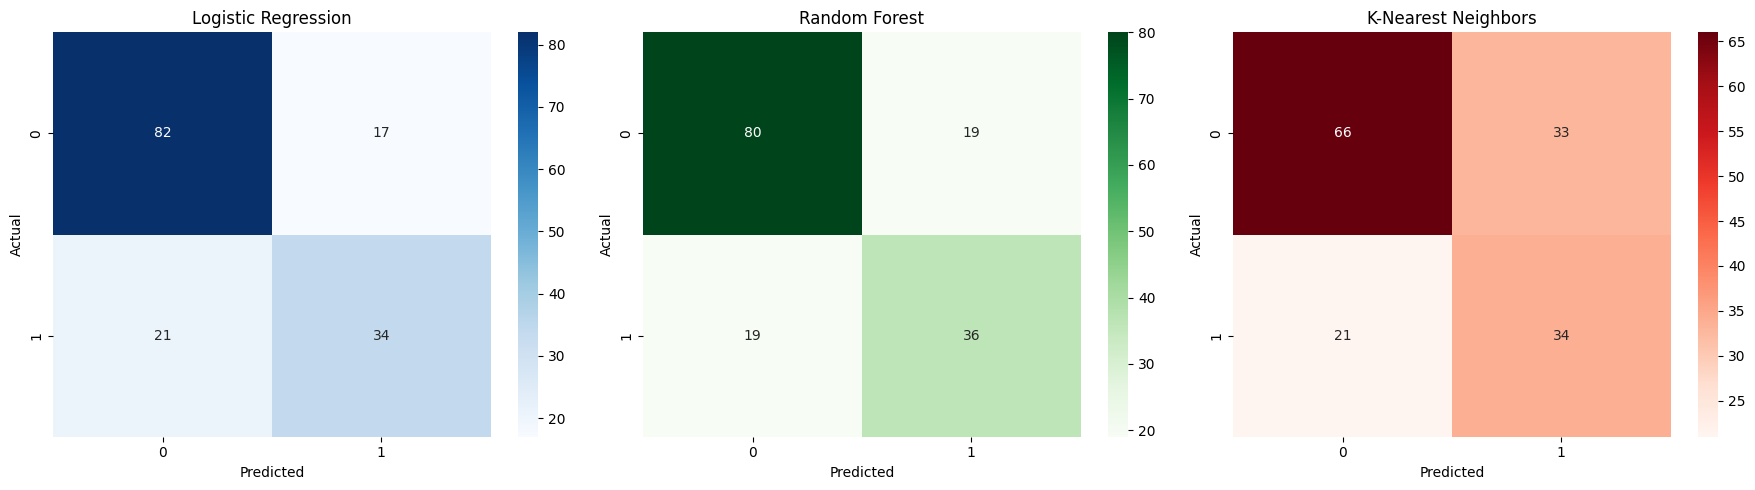

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Reds", ax=axes[2])
axes[2].set_title("K-Nearest Neighbors")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Créer le modèle
rf = RandomForestClassifier(random_state=42)

# Créer le GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Entraîner
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Best parameters found:", grid_search.best_params_)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions et évaluation
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[83 16]
 [20 35]]


In [25]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(best_model, 'diabetes_model.pkl')


['diabetes_model.pkl']

In [26]:
# import streamlit as st
# import joblib
# import numpy as np

# # Charger le modèle
# model = joblib.load('diabetes_model.pkl')

# st.title("Diabetes Prediction App")

# st.write("Entrez les informations médicales pour prédire le diabète :")

# # Entrées utilisateur
# pregnancies = st.number_input('Nombre de grossesses', min_value=0)
# glucose = st.number_input('Glucose', min_value=0)
# blood_pressure = st.number_input('Pression artérielle', min_value=0)
# skin_thickness = st.number_input('Épaisseur de la peau', min_value=0)
# insulin = st.number_input('Insuline', min_value=0)
# bmi = st.number_input('IMC (BMI)', min_value=0.0)
# dpf = st.number_input('Fonction péritonéale (DPF)', min_value=0.0)
# age = st.number_input('Âge', min_value=1)

# # Bouton de prédiction
# if st.button('Prédire'):
#     input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
#                             insulin, bmi, dpf, age]])
#     prediction = model.predict(input_data)

#     if prediction[0] == 1:
#         st.error('⚠️ La personne est probablement diabétique.')
#     else:
#         st.success('✅ La personne n’est probablement pas diabétique.')


In [27]:
!pip install gradio


In [31]:
import gradio as gr
import numpy as np

def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    prediction = best_model.predict(input_data)
    return "🛑 Diabétique" if prediction[0] == 1 else "✅ Non diabétique"

css = """
body {
    background: linear-gradient(135deg, #f5f7fa 0%, #e4f1fe 100%);
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}
h1 {
    color: #1a5276;
    text-align: center;
    font-weight: 700;
    margin-bottom: 0.5em;
}
.gr-block {
    background-color: white;
    border-radius: 15px;
    box-shadow: 0 4px 15px rgba(0, 0, 0, 0.08);
    padding: 20px;
    margin-bottom: 20px;
    border: 1px solid #e0e0e0;
}
.gr-button {
    background: linear-gradient(135deg, #3498db 0%, #2874a6 100%) !important;
    color: white !important;
    font-weight: 600 !important;
    border-radius: 12px !important;
    border: none !important;
    padding: 14px 28px !important;
    font-size: 16px !important;
    transition: all 0.3s !important;
    text-transform: uppercase;
    letter-spacing: 0.5px;
}
.gr-button:hover {
    transform: translateY(-2px) !important;
    box-shadow: 0 6px 15px rgba(41, 128, 185, 0.4) !important;
}
.gr-slider {
    margin-bottom: 15px;
}
.gr-slider .label {
    font-weight: 600 !important;
    color: #2c3e50 !important;
    margin-bottom: 8px !important;
}
.gr-textbox {
    font-size: 18px !important;
    font-weight: 600 !important;
    text-align: center !important;
    padding: 20px !important;
    border-radius: 12px !important;
    background-color: #f8f9fa !important;
    border: 2px solid #e0e0e0 !important;
}
.header {
    text-align: center;
    margin-bottom: 2em;
}
.header p {
    color: #7f8c8d;
    font-size: 18px;
    margin-top: 0;
}
.column {
    background-color: rgba(52, 152, 219, 0.05);
    border-radius: 15px;
    padding: 20px;
}
.medical-icon {
    font-size: 24px;
    margin-right: 10px;
    color: #3498db;
}
"""

with gr.Blocks(css=css) as demo:
    with gr.Column(elem_classes="header"):
        gr.Markdown("# <span class='medical-icon'>🩺</span> Prédiction du Diabète <span class='medical-icon'>💊</span>")
        gr.Markdown("Entrez les données médicales pour évaluer le risque de diabète")

    with gr.Row():
        with gr.Column(elem_classes="column"):
            pregnancies = gr.Slider(0, 20, value=0, label="Nombre de grossesses")
            glucose = gr.Slider(0, 200, value=100, label="Niveau de glucose (mg/dL)")
            blood_pressure = gr.Slider(0, 150, value=70, label="Pression artérielle (mm Hg)")
            skin_thickness = gr.Slider(0, 100, value=20, label="Épaisseur de la peau (mm)")

        with gr.Column(elem_classes="column"):
            insulin = gr.Slider(0, 900, value=30, label="Niveau d'insuline (mu U/ml)")
            bmi = gr.Slider(0, 70, value=25, label="Indice de masse corporelle (IMC)")
            dpf = gr.Slider(0, 3, value=0.5, label="Fonction péritonéale (DPF)", step=0.01)
            age = gr.Slider(10, 100, value=30, label="Âge (années)")

    with gr.Row():
        predict_btn = gr.Button("Analyser les résultats", elem_id="predict-btn")

    output = gr.Textbox(label="Résultat de l'analyse", elem_id="result-box")

    predict_btn.click(
        fn=predict_diabetes,
        inputs=[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age],
        outputs=output
    )

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f2c700cebc90777e14.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


amelioration interface

In [32]:
import gradio as gr
import numpy as np

def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    prediction = best_model.predict(input_data)
    return "🛑 Diabétique" if prediction[0] == 1 else "✅ Non diabétique"

css = """
body {
    background: #f8f9fa;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}
h1 {
    color: #2c3e50;
    text-align: center;
    font-weight: 700;
    margin-bottom: 0.5em;
}
.gr-block {
    background-color: white;
    border-radius: 12px;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.05);
    padding: 20px;
    margin-bottom: 15px;
    border: none;
}
.gr-button {
    background: linear-gradient(135deg, #e74c3c 0%, #c0392b 100%) !important;
    color: white !important;
    font-weight: 600 !important;
    border-radius: 8px !important;
    border: none !important;
    padding: 12px 24px !important;
    font-size: 16px !important;
    transition: all 0.3s !important;
    width: 100%;
    margin-top: 10px;
}
.gr-button:hover {
    transform: translateY(-2px) !important;
    box-shadow: 0 4px 12px rgba(231, 76, 60, 0.3) !important;
}
.gr-slider {
    margin-bottom: 15px;
}
.gr-slider .label {
    font-weight: 600 !important;
    color: #2c3e50 !important;
    margin-bottom: 8px !important;
    font-size: 14px;
}
.gr-textbox {
    font-size: 18px !important;
    font-weight: 600 !important;
    text-align: center !important;
    padding: 15px !important;
    border-radius: 8px !important;
    background-color: #f8f9fa !important;
    border: 1px solid #e0e0e0 !important;
    margin-top: 10px;
}
.header {
    text-align: center;
    margin-bottom: 1.5em;
}
.header p {
    color: #7f8c8d;
    font-size: 16px;
    margin-top: 0;
}
.column {
    background-color: white;
    border-radius: 12px;
    padding: 15px;
    box-shadow: 0 2px 8px rgba(0, 0, 0, 0.05);
}
.section-title {
    font-size: 18px;
    font-weight: 600;
    color: #2c3e50;
    margin-bottom: 15px;
    padding-bottom: 8px;
    border-bottom: 2px solid #e74c3c;
}
.result-card {
    background: linear-gradient(135deg, #f5f7fa 0%, #e4f1fe 100%);
    padding: 20px;
    border-radius: 12px;
    margin-top: 20px;
}
"""

with gr.Blocks(css=css) as demo:
    with gr.Column(elem_classes="header"):
        gr.Markdown("# 🩺 Suivi Médical: Prédiction du Diabète")
        gr.Markdown("Analysez votre risque de diabète en fonction de vos paramètres de santé")

    with gr.Row():
        with gr.Column(elem_classes="column"):
            gr.Markdown("### Paramètres Physiologiques", elem_classes="section-title")
            pregnancies = gr.Slider(0, 20, value=0, label="Grossesses")
            age = gr.Slider(10, 100, value=30, label="Âge (années)")
            bmi = gr.Slider(0, 70, value=25, label="Indice de masse corporelle (IMC)")
            skin_thickness = gr.Slider(0, 100, value=20, label="Épaisseur de la peau (mm)")

        with gr.Column(elem_classes="column"):
            gr.Markdown("### Paramètres Biochimiques", elem_classes="section-title")
            glucose = gr.Slider(0, 200, value=100, label="Glucose (mg/dL)")
            blood_pressure = gr.Slider(0, 150, value=70, label="Pression artérielle (mm Hg)")
            insulin = gr.Slider(0, 900, value=30, label="Insuline (mu U/ml)")
            dpf = gr.Slider(0, 3, value=0.5, label="Fonction péritonéale (DPF)", step=0.01)

    with gr.Column(elem_classes="result-card"):
        predict_btn = gr.Button("Analyser mes résultats", elem_id="predict-btn")
        output = gr.Textbox(label="Résultat de l'analyse", elem_id="result-box")

    with gr.Row():
        with gr.Column():
            gr.Markdown("### Statistiques de Santé", elem_classes="section-title")
            gr.Markdown("""
            | Paramètre | Valeur Normale | Votre Valeur |
            |-----------|----------------|--------------|
            | Glucose | < 100 mg/dL | À analyser |
            | Pression | < 120/80 mmHg | À analyser |
            | IMC | 18.5 - 24.9 | À analyser |
            """)

        with gr.Column():
            gr.Markdown("### Recommandations", elem_classes="section-title")
            gr.Markdown("""
            - Maintenez une alimentation équilibrée
            - Faites de l'exercice régulièrement
            - Contrôlez votre glycémie
            - Consultez régulièrement votre médecin
            """)

    predict_btn.click(
        fn=predict_diabetes,
        inputs=[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age],
        outputs=output
    )

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://896c852aae6d036a9a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
